In [1]:
import tweepy
import webbrowser
import time
import re
import requests
import statistics
import numpy
import pandas as pd
from matplotlib import pyplot as plt 

In [2]:
consumer_key = "7ZOCRSoDj7s98J1rIoKNEfaC8"
consumer_secret_key = "VpuPG2kLwF9b63ryupu3lLrcS01Wi3IDfsZLX7xNdv0HVwLvzC"

In [3]:
callback_uri ='oob'

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key, callback_uri)
redirect_url = auth.get_authorization_url()
print (redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=AIyd5AAAAAABIcLIAAABdV5K1IU


In [5]:
webbrowser.open(redirect_url)

True

In [6]:
user_pin_input = input("whats is the pin? ")

whats is the pin? 2021247


In [7]:
user_pin_input

'2021247'

In [8]:
auth.get_access_token(user_pin_input)

('1314029060654329856-jTbNEMnsdTbRhOAb4hAMvAFC0mT9HT',
 'ZbZP2fLWCOLU9YrEPZNk9zEJESAyMmJig7AJhmEvVSW3P')

In [9]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [10]:
me = api.me()

In [11]:
print(me.screen_name)

DESMONDCHAMBE13


In [12]:
other_user = api.get_user("weiglemc")
print(other_user.followers_count, other_user.friends_count)

432 260


In [13]:
other_user = "weiglemc"
other_user_friends_list = []
friend_screen_name = []
friend_followers = []
for i, _id in enumerate(tweepy.Cursor(api.friends_ids, screen_name=other_user).items(100)):
    other_user_friends_list.append(_id)

for item in other_user_friends_list:
    friend_screen_name.append(api.get_user(item).screen_name)

for item in friend_screen_name:
    other_user_friends = api.get_user(item)
    friend_followers.append(other_user_friends.followers_count)
    
df = pd.DataFrame(list(zip(friend_screen_name, friend_followers)), 
               columns =['user', 'FRIENDCOUNT']) 

In [14]:
mean_val = statistics.mean(friend_followers)
print("Mean is :", mean_val)


std = numpy.std(friend_followers)
print("Standard deviation is :", std)

median_val = statistics.median(friend_followers)
print("Median is :", median_val)

Mean is : 776515
Standard deviation is : 3330909.9241873263
Median is : 1330.0


In [21]:
for i, row in df.iterrows():
    df.at[i,'user'] = 'f' + str(i)

In [22]:
df = df.sort_values("FRIENDCOUNT")
other_user = api.get_user("weiglemc")
new_info = {"user":'u', "FRIENDCOUNT":other_user.followers_count}
df = df.append(new_info, ignore_index=True)

<function matplotlib.pyplot.show(close=None, block=None)>

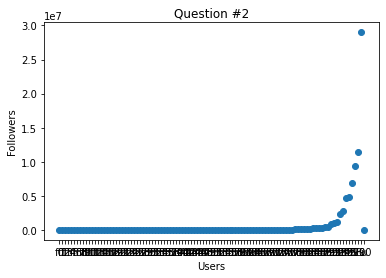

In [26]:
plt.scatter(df["user"], df["FRIENDCOUNT"])
plt.title("Question #2")
plt.xlabel("Users")
plt.ylabel("Followers")
plt.savefig('question2graph.png')
plt.show